## Data Preprocessing

In [ ]:
loan_data = loan_data.drop(columns=['Loan_ID'], axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Handling Missing Values

In [ ]:
loan_data.isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_data = loan_data.isna().sum()
null_data.sort_values()

Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

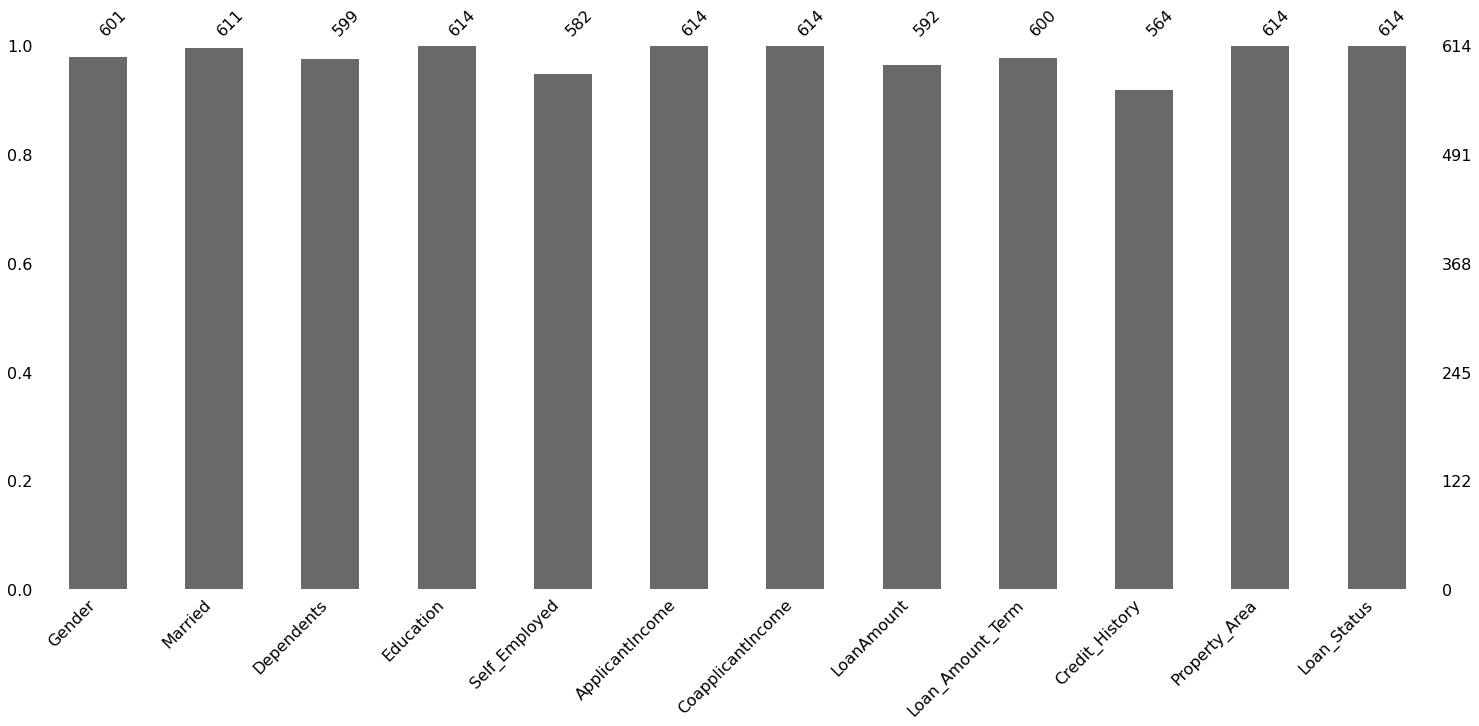

In [ ]:
msno.bar(loan_data)

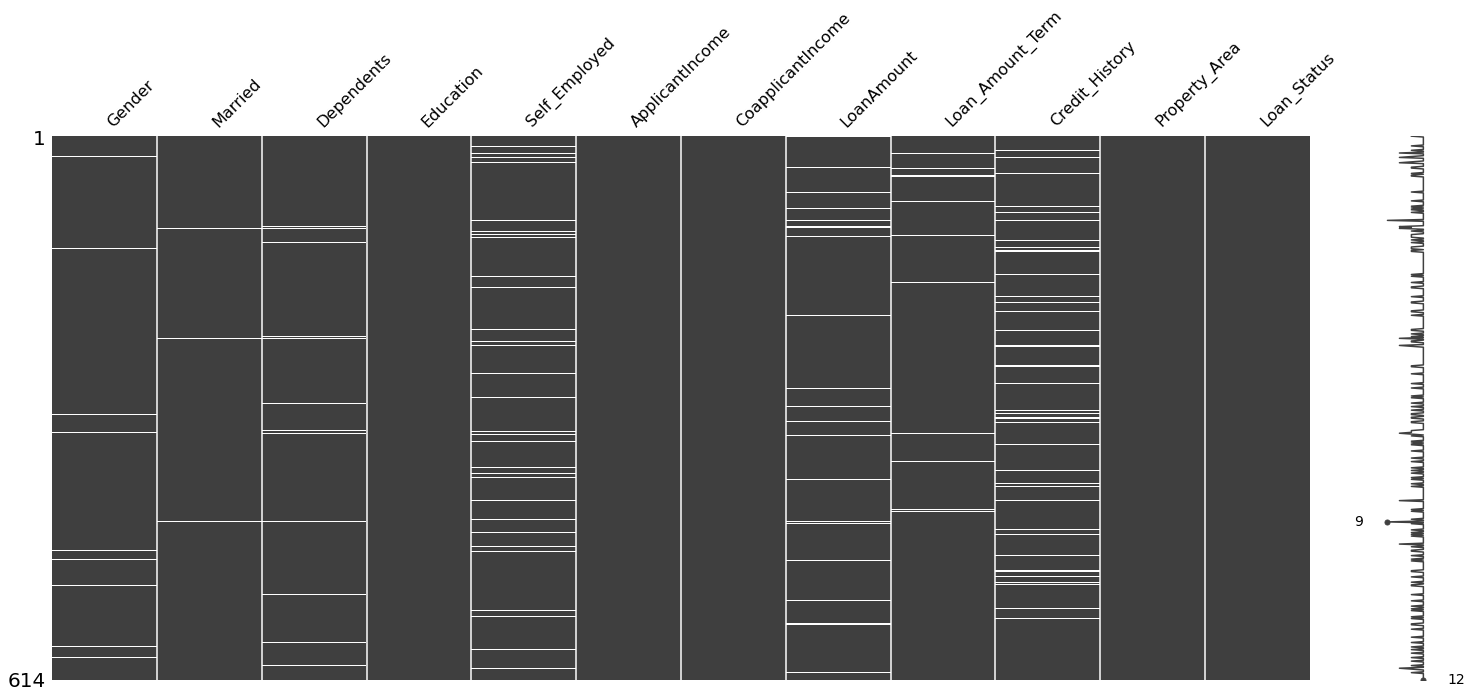

In [ ]:
msno.matrix(loan_data)

In [ ]:
unique_cols = loan_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
for col in unique_cols:
  print(col,loan_data[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Loan_Amount_Term [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History [ 1.  0. nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [ ]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].str.replace('+','')
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mode()[0])
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_data['CoapplicantIncome'] = loan_data['CoapplicantIncome'].astype('int64')
loan_data['LoanAmount'] = loan_data['LoanAmount'].astype('int64')
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype('int64')
loan_data['Credit_History'] = loan_data['Credit_History'].astype('int64')
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,120,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [ ]:
unique_cols = loan_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
for col in unique_cols:
  print(col,loan_data[col].unique())

Gender [1 0]
Married [0 1]
Dependents [0 1 2 3 4]
Education [0 1]
Self_Employed [0 1]
Loan_Amount_Term [360 120 240 180  60 300 480  36  84  12]
Credit_History [1 0]
Property_Area [2 0 1]
Loan_Status [1 0]


In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoding_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_encoding_columns:
  loan_data[col]= label_encoder.fit_transform(loan_data[col])

loan_data  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


In [ ]:
smk = SMOTETomek(0.90)

y = loan_data['Loan_Status']
x = loan_data.drop(columns=['Loan_Status'],axis=1)

x_bal, y_bal = smk.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    359
0    316
Name: Loan_Status, dtype: int64


In [ ]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)

In [ ]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)